# Simulation Project

In [157]:
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
import pandas as pd
from mpl_toolkits import mplot3d

In [158]:
def randomFailureTime():
    return(int(random.uniform(100,200)*100)/100)
def randomTransportationTime():
    return(int(random.uniform(10,15)*100)/100)
def randomRepairTime():
    return(int(random.uniform(30, 60)*100)/100)

In [159]:
y= []
x= []
y2= []
for repairmenNumber in range(2,40):
    x.append(repairmenNumber)
    Tnow = 0
    FEL = []
    T=2400
    for i in range(0, 63):
        FEL.append([i, randomFailureTime()])
    Q=0
    spareMachinesNumber = 7
    stopProduction = 0
    workingMachinesNumber = 63
    #repairmenNumber = 100
    freeRepairmen = [1]*repairmenNumber
    stopProductionTime = 0
    workersOccupationTime = [0]*repairmenNumber
    totalRepairedMachines = [0]*repairmenNumber

    while Tnow<T:
        FEL.sort(key=lambda x: x[1])
        currentEvent = FEL.pop(0)
        print(currentEvent)
        Tnow=currentEvent[1]
        eventCode=currentEvent[0]
        #Failure
        if eventCode<=62:
            if spareMachinesNumber > 0:
                spareMachinesNumber-=1
                FEL.append([eventCode,Tnow+randomFailureTime()])
            else:
                if workingMachinesNumber==63:
                    stopProduction=Tnow
                    stopped = 1
                workingMachinesNumber-=1
                

            #repairment
            if Q==0:
                if sum(freeRepairmen)>0:
                    freeIndex = 0
                    for i in range(0, repairmenNumber):
                        if freeRepairmen[i]==1:
                            break
                    freeRepairmen[i]=0
                    repairTime = randomRepairTime()
                    workersOccupationTime[i]+=repairTime
                    FEL.append([63+i,Tnow+randomTransportationTime()+repairTime])
                            
                else:
                    Q+=1
            else:
                Q+=1
        elif eventCode>62:
            workerCode=eventCode-63
            totalRepairedMachines[workerCode]+=1
            #repairFinish
            if workingMachinesNumber<63:
                workingMachinesNumber+=1
                FEL.append([50,Tnow+randomTransportationTime()+randomFailureTime()])
                if workingMachinesNumber==63:
                    if stopped==1:
                        stopProductionTime=stopProductionTime+ (Tnow-stopProduction)
                    stopped = 0
            else:
                spareMachinesNumber+=1
            
            if Q>0:
                Q=Q-1
                repairTime=randomRepairTime()
                workersOccupationTime[workerCode]+=repairTime
                FEL.append([eventCode,Tnow+repairTime])
            else:
                freeRepairmen[workerCode]=1
    if workingMachinesNumber<63:
        stopProductionTime=stopProductionTime+ (Tnow-stopProduction)
    y.append(stopProductionTime)        
    #Occupation Rate
    y2.append(np.mean([time /2400 for time in workersOccupationTime]))
    print(totalRepairedMachines)
    print(stopProductionTime)

[19, 102.32]
[50, 111.57]
[58, 112.63]
[21, 112.74]
[32, 114.19]
[45, 116.49]
[18, 119.56]
[9, 121.71]
[17, 124.12]
[27, 125.39]
[57, 125.44]
[20, 130.53]
[56, 133.46]
[16, 134.82]
[13, 134.92]
[31, 135.05]
[34, 135.17]
[0, 135.37]
[2, 136.89]
[37, 137.2]
[1, 138.04]
[53, 139.66]
[24, 140.25]
[3, 141.32]
[14, 141.6]
[22, 141.97]
[8, 141.98]
[28, 144.76]
[60, 146.92]
[35, 153.55]
[49, 153.65]
[36, 153.93]
[29, 154.2]
[33, 154.54]
[44, 157.24]
[55, 158.67]
[25, 159.76]
[54, 159.76]
[5, 160.1]
[51, 160.91]
[26, 162.02]
[11, 164.23]
[63, 164.26]
[4, 165.38]
[7, 165.58]
[42, 166.42]
[10, 166.83]
[6, 171.18]
[15, 171.73]
[39, 173.11]
[64, 176.79]
[12, 178.49]
[40, 179.5]
[61, 179.98]
[41, 181.68]
[47, 183.5]
[59, 187.47]
[46, 189.24]
[30, 190.5]
[48, 191.86]
[43, 192.22]
[62, 192.41]
[52, 192.8]
[23, 192.99]
[38, 196.3]
[63, 201.58999999999997]
[19, 208.54]
[64, 213.97]
[32, 227.97]
[21, 246.21999999999997]
[64, 247.99]
[18, 249.89000000000001]
[50, 250.15]
[63, 251.99999999999997]
[58, 270.

[50, 1158.2200000000003]
[74, 1158.6199999999997]
[87, 1159.6399999999999]
[50, 1160.12]
[67, 1160.7099999999998]
[75, 1164.2299999999998]
[68, 1167.0600000000002]
[50, 1167.68]
[50, 1169.9799999999996]
[63, 1171.6]
[50, 1174.05]
[50, 1177.56]
[77, 1177.95]
[80, 1179.6]
[71, 1180.0]
[50, 1180.81]
[66, 1182.43]
[78, 1184.59]
[64, 1184.8700000000001]
[50, 1191.93]
[81, 1192.3200000000002]
[50, 1197.71]
[83, 1199.6999999999998]
[76, 1200.2900000000004]
[50, 1200.8999999999996]
[72, 1202.52]
[74, 1204.09]
[73, 1206.7999999999997]
[69, 1208.43]
[50, 1211.46]
[67, 1215.31]
[50, 1215.78]
[50, 1217.4500000000003]
[50, 1218.71]
[50, 1219.11]
[82, 1220.6999999999998]
[65, 1220.84]
[50, 1221.67]
[70, 1223.5700000000002]
[50, 1224.26]
[50, 1224.64]
[68, 1225.9499999999996]
[63, 1227.6]
[50, 1228.6999999999998]
[50, 1231.7899999999997]
[75, 1236.57]
[50, 1238.3799999999999]
[50, 1239.33]
[50, 1240.0499999999997]
[64, 1240.11]
[50, 1241.1799999999998]
[76, 1247.3399999999997]
[50, 1250.5900000000001

[70, 630.7600000000001]
[86, 636.25]
[50, 636.8199999999999]
[50, 637.8800000000001]
[81, 637.98]
[50, 638.13]
[50, 641.1]
[88, 641.1300000000001]
[72, 641.94]
[63, 642.01]
[85, 643.26]
[74, 643.52]
[82, 644.1700000000001]
[89, 646.8000000000001]
[87, 650.9499999999999]
[50, 651.43]
[65, 651.85]
[50, 652.91]
[76, 655.0400000000001]
[79, 655.2600000000001]
[50, 656.07]
[90, 658.09]
[68, 660.6700000000001]
[50, 660.82]
[50, 662.26]
[66, 662.43]
[80, 664.5400000000001]
[73, 665.2]
[50, 667.1199999999999]
[67, 667.35]
[50, 667.4399999999999]
[93, 667.71]
[77, 668.39]
[92, 668.4599999999999]
[78, 668.72]
[91, 668.75]
[69, 670.67]
[71, 673.9199999999998]
[50, 678.23]
[50, 678.28]
[70, 684.8600000000001]
[50, 689.26]
[75, 690.0499999999998]
[81, 691.44]
[83, 694.4200000000001]
[50, 695.1300000000001]
[64, 695.6899999999999]
[72, 699.1800000000001]
[50, 702.18]
[50, 703.1400000000001]
[50, 706.5600000000001]
[50, 709.23]
[50, 710.3600000000001]
[65, 713.8799999999999]
[50, 715.08]
[63, 716.93]

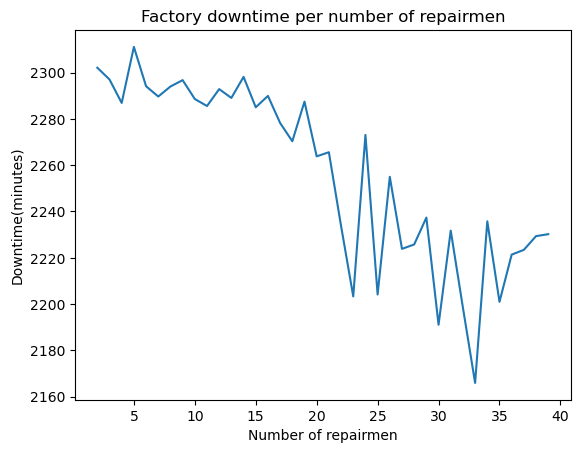

In [160]:
plt.plot(x,y)
plt.title("Factory downtime per number of repairmen")
plt.xlabel("Number of repairmen")
plt.ylabel("Downtime(minutes)")
plt.show()

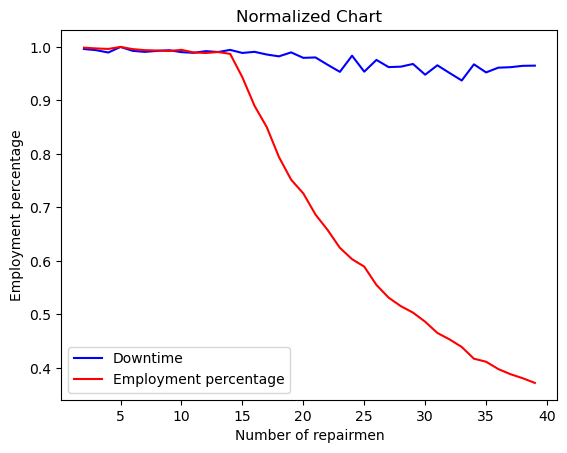

In [161]:
plt.plot(x,[float(i)/max(y) for i in y], color='blue', label='Downtime')
plt.plot(x,[float(i)/max(y2) for i in y2], color='red', label='Employment percentage')
plt.title("Normalized Chart")
plt.xlabel("Number of repairmen")
plt.ylabel("Employment percentage")
plt.legend()  
plt.show()

In [162]:
totalRepairedStat = []
totslLossStat = []
SumLossTime = []
eachWorkerRepaired = []
eachWorkerOccupation = []
totalTransportationStat = []
maxQstat = []
for counter in range(0,10):
    totalTransportation = 0
    repairmenNumber=14
    Tnow = 0
    FEL = []
    T=2400
    for i in range(0, 63):
        FEL.append([i, randomFailureTime()])
    Q=0
    maxQ=0
    spareMachinesNumber = 7
    stopProduction = 0
    workingMachinesNumber = 63
    #repairmenNumber = 100
    freeRepairmen = [1]*repairmenNumber
    stopProductionTime = 0
    workersOccupationTime = [0]*repairmenNumber
    totalRepairedMachines = [0]*repairmenNumber
    stopped = 0
    totalLossTime = 0
    while Tnow<T:
        FEL.sort(key=lambda x: x[1])
        currentEvent = FEL.pop(0)
        Tnow=currentEvent[1]
        eventCode=currentEvent[0]
        #Failure
        if eventCode<=62:
            if spareMachinesNumber > 0:
                spareMachinesNumber-=1
                FEL.append([eventCode,Tnow+randomFailureTime()])
            else:
                if workingMachinesNumber==63:
                    stopProduction=Tnow
                    stopped = 1
                workingMachinesNumber-=1
                

            #repairment
            if Q==0:
                if sum(freeRepairmen)>0:
                    freeIndex = 0
                    for i in range(0, repairmenNumber):
                        if freeRepairmen[i]==1:
                            break
                    freeRepairmen[i]=0
                    repairTime = randomRepairTime()
                    workersOccupationTime[i]+=repairTime
                    transportationTime = randomTransportationTime()
                    totalTransportation=totalTransportation+transportationTime
                    FEL.append([63+i,Tnow+transportationTime+repairTime])
                            
                else:
                    Q+=1
                    if Q>maxQ:
                        maxQ=Q
            else:
                Q+=1
                if Q>maxQ:
                    maxQ=Q
        elif eventCode>62:
            workerCode=eventCode-63
            totalRepairedMachines[workerCode]+=1
            #repairFinish
            if workingMachinesNumber<63:
                workingMachinesNumber+=1
                transportationTime = randomTransportationTime()
                FEL.append([0,Tnow+transportationTime+randomFailureTime()])
                
                totalTransportation=totalTransportation+transportationTime
                if workingMachinesNumber==63:
                    if stopped==1:
                        stopProductionTime=stopProductionTime+ (Tnow-stopProduction)
                        totalLossTime+=1
                    stopped = 0
            else:
                spareMachinesNumber+=1
            
            if Q>0:
                Q=Q-1
                repairTime=randomRepairTime()
                workersOccupationTime[workerCode]+=repairTime
                FEL.append([eventCode,Tnow+repairTime])
            else:
                freeRepairmen[workerCode]=1
    if workingMachinesNumber<63:
        stopProductionTime=stopProductionTime+ (Tnow-stopProduction)
        totalLossTime+=1
    totalRepairedStat.append(np.sum(totalRepairedMachines))      
    totslLossStat.append(totalLossTime)
    SumLossTime.append(stopProductionTime)
    eachWorkerRepaired.append(totalRepairedMachines)
    eachWorkerOccupation.append([time /2400 for time in workersOccupationTime])
    totalTransportationStat.append(totalTransportation)
    maxQstat.append(maxQ)

In [163]:
pd.DataFrame([totalRepairedStat,totslLossStat,SumLossTime,eachWorkerRepaired,eachWorkerOccupation,totalTransportationStat,maxQstat])

,0,1,2,3,4,5,6,7,8,9
0,722,717,722,723,722,719,717,721,719,723
1,4,1,2,1,1,1,5,1,3,1
2,2269.28,2292.39,2291.45,2288.47,2293.32,2288.96,2281.59,2297.78,2288.66,2293.01
3,"[49, 45, 46, 46, 44, 45, 47, 45, 47, 44, 45, 4...","[46, 46, 44, 45, 46, 45, 45, 47, 47, 47, 44, 4...","[48, 47, 47, 42, 45, 48, 46, 45, 45, 45, 45, 4...","[45, 44, 43, 48, 45, 48, 44, 44, 47, 44, 48, 4...","[43, 46, 46, 46, 48, 46, 43, 47, 47, 43, 46, 4...","[47, 45, 47, 46, 47, 46, 46, 45, 46, 47, 44, 4...","[46, 46, 48, 48, 45, 46, 44, 44, 46, 45, 44, 4...","[48, 48, 45, 46, 45, 45, 44, 45, 47, 47, 45, 4...","[48, 45, 46, 44, 44, 45, 46, 47, 45, 46, 47, 4...","[47, 46, 47, 45, 45, 47, 46, 45, 46, 46, 45, 4..."
4,"[0.90565, 0.8768375000000002, 0.88188749999999...","[0.9023958333333333, 0.882425, 0.8694291666666...","[0.9002291666666667, 0.8883791666666664, 0.887...","[0.8804374999999997, 0.873016666666667, 0.8742...","[0.8647375000000002, 0.8520291666666663, 0.872...","[0.8699541666666666, 0.8907416666666668, 0.874...","[0.8960041666666666, 0.8797499999999997, 0.913...","[0.8817541666666667, 0.8804666666666666, 0.892...","[0.8868875, 0.8791833333333333, 0.893454166666...","[0.8766125000000003, 0.8942874999999998, 0.870..."
5,11155.59,11412.05,11284.73,11685.38,11875.76,11550.13,11474.26,11344.77,11497.88,11490.45
6,30,29,30,31,29,27,29,28,31,26


In [164]:
CostArray = []
for repairmenNumber in range(2,30):
    for spareMachinesNumber in range(2,30):
        print(repairmenNumber, spareMachinesNumber)
        spareMachinesNumberActual = spareMachinesNumber
        totalTransportation = 0
        Tnow = 0
        FEL = []
        T=2400
        for i in range(0, 63):
            FEL.append([i, randomFailureTime()])
        Q=0
        maxQ=0
        stopProduction = 0
        workingMachinesNumber = 63
        #repairmenNumber = 100
        freeRepairmen = [1]*repairmenNumber
        stopProductionTime = 0
        workersOccupationTime = [0]*repairmenNumber
        totalRepairedMachines = [0]*repairmenNumber
        stopped = 0
        totalLossTime = 0
        while Tnow<T:
            FEL.sort(key=lambda x: x[1])
            currentEvent = FEL.pop(0)
            Tnow=currentEvent[1]
            eventCode=currentEvent[0]
            #Failure
            if eventCode<=62:
                if spareMachinesNumber > 0:
                    spareMachinesNumber-=1
                    FEL.append([eventCode,Tnow+randomFailureTime()])
                else:
                    if workingMachinesNumber==63:
                        stopProduction=Tnow
                        stopped = 1
                    workingMachinesNumber-=1
                    

                #repairment
                if Q==0:
                    if sum(freeRepairmen)>0:
                        freeIndex = 0
                        for i in range(0, repairmenNumber):
                            if freeRepairmen[i]==1:
                                break
                        freeRepairmen[i]=0
                        repairTime = randomRepairTime()
                        workersOccupationTime[i]+=repairTime
                        transportationTime = randomTransportationTime()
                        totalTransportation=totalTransportation+transportationTime
                        FEL.append([63+i,Tnow+transportationTime+repairTime])
                                
                    else:
                        Q+=1
                        if Q>maxQ:
                            maxQ=Q
                else:
                    Q+=1
                    if Q>maxQ:
                        maxQ=Q
            elif eventCode>62:
                workerCode=eventCode-63
                totalRepairedMachines[workerCode]+=1
                #repairFinish
                if workingMachinesNumber<63:
                    workingMachinesNumber+=1
                    transportationTime = randomTransportationTime()
                    FEL.append([0,Tnow+transportationTime+randomFailureTime()])
                    
                    totalTransportation=totalTransportation+transportationTime
                    if workingMachinesNumber==63:
                        if stopped==1:
                            stopProductionTime=stopProductionTime+ (Tnow-stopProduction)
                            totalLossTime+=1
                        stopped = 0
                else:
                    spareMachinesNumber+=1
                
                if Q>0:
                    Q=Q-1
                    repairTime=randomRepairTime()
                    workersOccupationTime[workerCode]+=repairTime
                    FEL.append([eventCode,Tnow+repairTime])
                else:
                    freeRepairmen[workerCode]=1
        if workingMachinesNumber<63:
            stopProductionTime=stopProductionTime+ (Tnow-stopProduction)
            totalLossTime+=1
        CostArray.append([spareMachinesNumberActual,repairmenNumber,totalLossTime*10+sum(workersOccupationTime)])

2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18

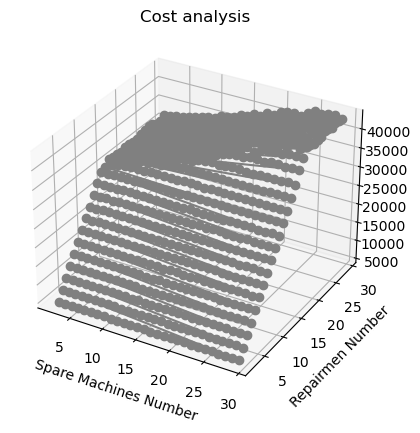

In [165]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D([i[0] for i in CostArray], [i[1] for i in CostArray], [i[2] for i in CostArray], 'gray',marker = 'o')
ax.set_xlabel('Spare Machines Number')
ax.set_ylabel('Repairmen Number')
ax.set_title('Cost analysis')
plt.show()